===== INFO DATASET =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_time        8784 non-null   datetime64[ns]
 1   temp_c           8784 non-null   float64       
 2   rel_hum_percent  8784 non-null   int64         
 3   press_kpa        8784 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 274.6 KB
None

===== STATISTIK DESKRIPTIF =====
                 date_time       temp_c  rel_hum_percent    press_kpa
count                 8784  8784.000000      8784.000000  8784.000000
mean   2012-07-01 23:30:00     8.798144        67.431694   101.051623
min    2012-01-01 00:00:00   -23.300000        18.000000    97.520000
25%    2012-04-01 11:45:00     0.100000        56.000000   100.560000
50%    2012-07-01 23:30:00     9.300000        68.000000   101.070000
75%    2012-10-01 11:

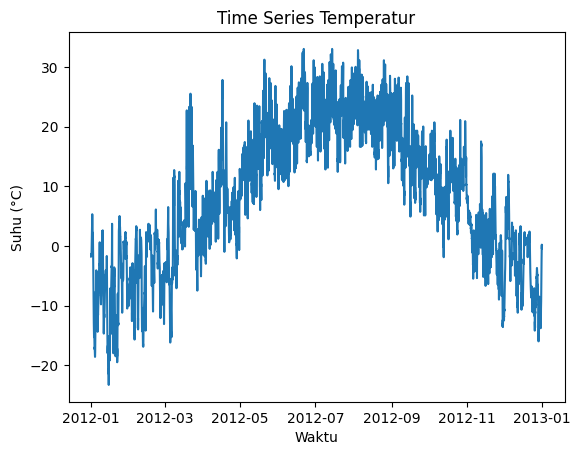

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ======================================================
# 1. LOAD DATA LANGSUNG DARI GITHUB (RAW URL)
# ======================================================
url = "https://raw.githubusercontent.com/velicki/Weather_Data_Analysis_Project/refs/heads/main/Weather_Data.csv"
data = pd.read_csv(url)

# ======================================================
# 2. RAPIAKAN NAMA KOLOM
# ======================================================
data.columns = (
    data.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("/", "_")
        .str.replace("%", "percent")
)

# ======================================================
# 3. PARSING & VALIDASI KOLOM WAKTU
# ======================================================
data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')

# Hapus baris dengan waktu tidak valid
data = data.dropna(subset=['date_time'])

# Urutkan berdasarkan waktu
data = data.sort_values('date_time').reset_index(drop=True)

# ======================================================
# 4. HAPUS DUPLIKAT & MISSING VALUE
# ======================================================
data = data.drop_duplicates(subset='date_time')
data = data.ffill()

# ======================================================
# 5. PILIH SENSOR YANG DIGUNAKAN (FOCUS)
# ======================================================
data = data[['date_time', 'temp_c', 'rel_hum_percent', 'press_kpa']]

# ======================================================
# 6. CEK STRUKTUR DATA (WAJIB DI TUGAS)
# ======================================================
print("===== INFO DATASET =====")
print(data.info())

print("\n===== STATISTIK DESKRIPTIF =====")
print(data.describe())

# ======================================================
# 7. VISUALISASI AWAL (EDA)
# ======================================================
plt.figure()
plt.plot(data['date_time'], data['temp_c'])
plt.title("Time Series Temperatur")
plt.xlabel("Waktu")
plt.ylabel("Suhu (°C)")
plt.show()


===== DATA SETELAH NORMALISASI =====
            date_time    temp_c  rel_hum_percent  press_kpa  temp_original
0 2012-01-01 00:00:00  0.381883         0.829268   0.606852           -1.8
1 2012-01-01 01:00:00  0.381883         0.841463   0.606852           -1.8
2 2012-01-01 02:00:00  0.381883         0.865854   0.610114           -1.8
3 2012-01-01 03:00:00  0.387211         0.853659   0.611746           -1.5
4 2012-01-01 04:00:00  0.387211         0.853659   0.605220           -1.5
                 date_time       temp_c  rel_hum_percent    press_kpa  \
count                 8784  8784.000000      8784.000000  8784.000000   
mean   2012-07-01 23:30:00     0.570127         0.602826     0.576121   
min    2012-01-01 00:00:00     0.000000         0.000000     0.000000   
25%    2012-04-01 11:45:00     0.415631         0.463415     0.495922   
50%    2012-07-01 23:30:00     0.579041         0.609756     0.579119   
75%    2012-10-01 11:15:00     0.747780         0.768293     0.663948   
ma

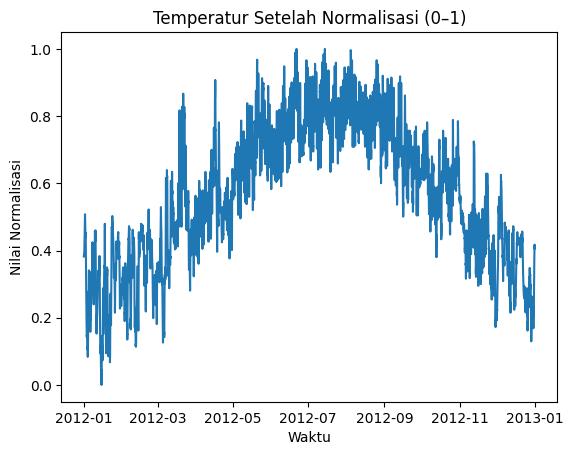

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ======================================================
# 1. LOAD DATA DARI GITHUB
# ======================================================
url = "https://raw.githubusercontent.com/velicki/Weather_Data_Analysis_Project/refs/heads/main/Weather_Data.csv"
data = pd.read_csv(url)

# ======================================================
# 2. CLEANING DASAR (LANGKAH 1, RINGKAS)
# ======================================================
data.columns = (
    data.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("/", "_")
        .str.replace("%", "percent")
)

data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')
data = data.dropna(subset=['date_time'])
data = data.sort_values('date_time').drop_duplicates(subset='date_time')
data = data.ffill().reset_index(drop=True)

data = data[['date_time', 'temp_c', 'rel_hum_percent', 'press_kpa']]

# ======================================================
# 3. NORMALISASI DATA SENSOR
# ======================================================
scaler = MinMaxScaler()

sensor_columns = ['temp_c', 'rel_hum_percent', 'press_kpa']
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])

data['temp_original'] = scaler.inverse_transform(
    data[['temp_c', 'rel_hum_percent', 'press_kpa']]
)[:, 0]

# ======================================================
# 4. CEK HASIL NORMALISASI
# ======================================================
print("===== DATA SETELAH NORMALISASI =====")
print(data.head())
print(data.describe())

# ======================================================
# 5. VISUALISASI SEBELUM vs SESUDAH (TEMPERATUR)
# ======================================================
plt.figure()
plt.plot(data['date_time'], data['temp_c'])
plt.title("Temperatur Setelah Normalisasi (0–1)")
plt.xlabel("Waktu")
plt.ylabel("Nilai Normalisasi")
plt.show()


===== DISTRIBUSI LABEL =====
anomaly
0    8750
1      34
Name: count, dtype: int64


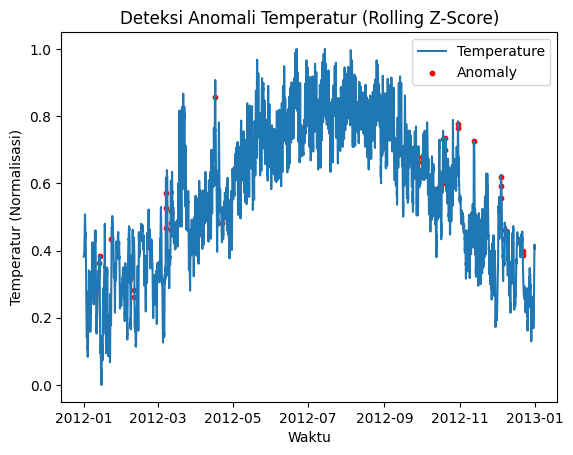

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ======================================================
# 1. LOAD DATA LANGSUNG DARI GITHUB
# ======================================================
url = "https://raw.githubusercontent.com/velicki/Weather_Data_Analysis_Project/refs/heads/main/Weather_Data.csv"
data = pd.read_csv(url)

# ======================================================
# 2. CLEANING DASAR
# ======================================================
data.columns = (
    data.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("/", "_")
        .str.replace("%", "percent")
)

data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')
data = data.dropna(subset=['date_time'])
data = data.sort_values('date_time')
data = data.drop_duplicates(subset='date_time')
data = data.ffill().reset_index(drop=True)

data = data[['date_time', 'temp_c', 'rel_hum_percent', 'press_kpa']]

# ======================================================
# 3. NORMALISASI DATA SENSOR
# ======================================================
scaler = MinMaxScaler()
sensor_cols = ['temp_c', 'rel_hum_percent', 'press_kpa']
data[sensor_cols] = scaler.fit_transform(data[sensor_cols])

# ======================================================
# 4. ROLLING Z-SCORE (TEMPERATUR)
# ======================================================
window_size = 24        # contoh: 24 jam
threshold = 3.0         # standar anomaly detection

rolling_mean = data['temp_c'].rolling(window=window_size).mean()
rolling_std = data['temp_c'].rolling(window=window_size).std()

data['z_score'] = (data['temp_c'] - rolling_mean) / rolling_std

# ======================================================
# 5. BUAT LABEL ANOMALI
# ======================================================
data['anomaly'] = np.where(
    data['z_score'].abs() > threshold, 1, 0
)

# ======================================================
# 6. CEK DISTRIBUSI ANOMALI
# ======================================================
print("===== DISTRIBUSI LABEL =====")
print(data['anomaly'].value_counts())

# ======================================================
# 7. VISUALISASI HASIL ANOMALI
# ======================================================
plt.figure()
plt.plot(data['date_time'], data['temp_c'], label='Temperature')
plt.scatter(
    data.loc[data['anomaly'] == 1, 'date_time'],
    data.loc[data['anomaly'] == 1, 'temp_c'],
    color='red',
    label='Anomaly',
    s=10
)
plt.title("Deteksi Anomali Temperatur (Rolling Z-Score)")
plt.xlabel("Waktu")
plt.ylabel("Temperatur (Normalisasi)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ======================================================
# 1. LOAD DATA DARI GITHUB
# ======================================================
url = "https://raw.githubusercontent.com/velicki/Weather_Data_Analysis_Project/refs/heads/main/Weather_Data.csv"
data = pd.read_csv(url)

# ======================================================
# 2. CLEANING DASAR
# ======================================================
data.columns = (
    data.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("/", "_")
        .str.replace("%", "percent")
)

data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')
data = data.dropna(subset=['date_time'])
data = data.sort_values('date_time')
data = data.drop_duplicates(subset='date_time')
data = data.ffill().reset_index(drop=True)

data = data[['date_time', 'temp_c', 'rel_hum_percent', 'press_kpa']]

# ======================================================
# 3. NORMALISASI DATA SENSOR
# ======================================================
scaler = MinMaxScaler()
sensor_cols = ['temp_c', 'rel_hum_percent', 'press_kpa']
data[sensor_cols] = scaler.fit_transform(data[sensor_cols])

# ======================================================
# 4. ROLLING Z-SCORE (LABEL ANOMALI)
# ======================================================
window_z = 24
threshold = 3.0

rolling_mean = data['temp_c'].rolling(window=window_z).mean()
rolling_std = data['temp_c'].rolling(window=window_z).std()

data['z_score'] = (data['temp_c'] - rolling_mean) / rolling_std
data['anomaly'] = np.where(data['z_score'].abs() > threshold, 1, 0)

# ======================================================
# 5. WINDOWING TIME SERIES
# ======================================================
def create_windows(features, labels, window_size):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features[i:i + window_size])
        y.append(labels[i + window_size - 1])
    return np.array(X), np.array(y)

WINDOW_SIZE = 30  # contoh: 30 timestep

features = data[sensor_cols].values
labels = data['anomaly'].values

X, y = create_windows(features, labels, WINDOW_SIZE)

# ======================================================
# 6. CEK BENTUK DATA (SANGAT PENTING)
# ======================================================
print("===== BENTUK DATA UNTUK CNN-LSTM =====")
print("X shape:", X.shape)  # (samples, timesteps, features)
print("y shape:", y.shape)

print("\nContoh 1 window:")
print(X[0])
print("Label:", y[0])


===== BENTUK DATA UNTUK CNN-LSTM =====
X shape: (8754, 30, 3)
y shape: (8754,)

Contoh 1 window:
[[0.38188277 0.82926829 0.60685155]
 [0.38188277 0.84146341 0.60685155]
 [0.38188277 0.86585366 0.61011419]
 [0.38721137 0.85365854 0.61174551]
 [0.38721137 0.85365854 0.60522023]
 [0.38898757 0.84146341 0.61174551]
 [0.38721137 0.86585366 0.61500816]
 [0.38898757 0.81707317 0.61011419]
 [0.38898757 0.81707317 0.60522023]
 [0.39076377 0.85365854 0.60032626]
 [0.39609236 0.8902439  0.59216966]
 [0.40497336 0.86585366 0.56443719]
 [0.41030195 0.85365854 0.53344209]
 [0.41740675 0.84146341 0.49918434]
 [0.42806394 0.84146341 0.45513866]
 [0.44582593 0.81707317 0.41598695]
 [0.46003552 0.7804878  0.39314845]
 [0.46714032 0.76829268 0.37357259]
 [0.48134991 0.7804878  0.36215334]
 [0.46891652 0.85365854 0.35236542]
 [0.47069272 0.84146341 0.32300163]
 [0.48490231 0.81707317 0.3050571 ]
 [0.4920071  0.80487805 0.29363785]
 [0.5079929  0.74390244 0.29200653]
 [0.5062167  0.7195122  0.28384992]
 [0

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 28, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,729 (131.75 KB)

 Trainable params: 33,729 (131.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9497 - loss: 0.1485 - val_accuracy: 0.9931 - val_loss: 0.0477
Epoch 2/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9962 - loss: 0.0262 - val_accuracy: 0.9931 - val_loss: 0.0450
Epoch 3/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9963 - loss: 0.0261 - val_accuracy: 0.9931 - val_loss: 0.0445
Epoch 4/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9970 - loss: 0.0214 - val_accuracy: 0.9931 - val_loss: 0.0448
Epoch 5/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9972 - loss: 0.0201 - val_accuracy: 0.9931 - val_loss: 0.0447
Epoch 6/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9979 - loss: 0.0157 - val_accuracy: 0.9931 - val_loss: 0.0427
Epoch 7/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9978 - loss: 0.0159 - val_accuracy: 0.9931 - val_loss: 0.0420
Epoch 8/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9971 - loss: 0.0203 - val_acc

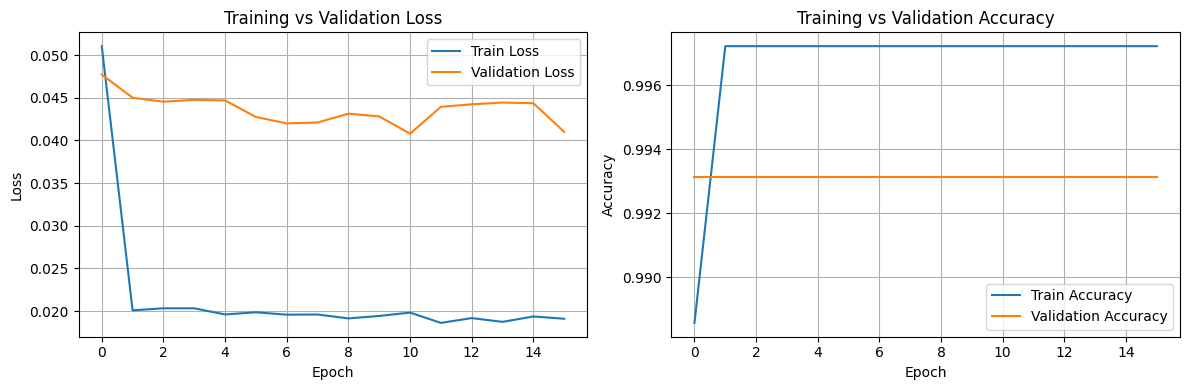

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

=== CONFUSION MATRIX ===
[[1306    0]
 [   8    0]]

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1306
           1       0.00      0.00      0.00         8

    accuracy                           0.99      1314
   macro avg       0.50      0.50      0.50      1314
weighted avg       0.99      0.99      0.99      1314



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


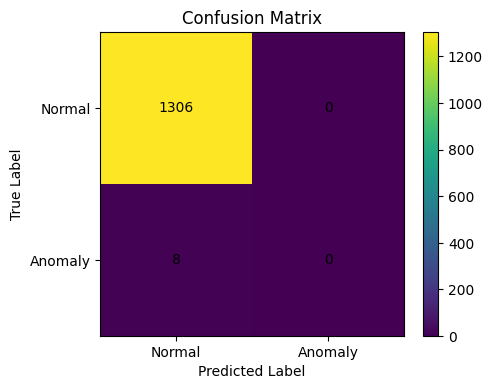

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# ======================================================
# 1. LOAD DATA DARI GITHUB
# ======================================================
url = "https://raw.githubusercontent.com/velicki/Weather_Data_Analysis_Project/refs/heads/main/Weather_Data.csv"
data = pd.read_csv(url)

# ======================================================
# 2. CLEANING DASAR
# ======================================================
data.columns = (
    data.columns.str.strip().str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("%", "percent")
)

data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')
data = data.dropna(subset=['date_time'])
data = data.sort_values('date_time')
data = data.drop_duplicates(subset='date_time')
data = data.ffill().reset_index(drop=True)

data = data[['date_time', 'temp_c', 'rel_hum_percent', 'press_kpa']]

# ======================================================
# 3. NORMALISASI
# ======================================================
scaler = MinMaxScaler()
features_col = ['temp_c', 'rel_hum_percent', 'press_kpa']
data[features_col] = scaler.fit_transform(data[features_col])

# ======================================================
# 4. ROLLING Z-SCORE (LABEL)
# ======================================================
window_z = 24
threshold = 3.0

mean = data['temp_c'].rolling(window_z).mean()
std = data['temp_c'].rolling(window_z).std()

data['z_score'] = (data['temp_c'] - mean) / std
data['anomaly'] = np.where(data['z_score'].abs() > threshold, 1, 0)

# ======================================================
# 5. WINDOWING TIME SERIES
# ======================================================
def create_window(X, y, window_size):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:i+window_size])
        ys.append(y[i+window_size-1])
    return np.array(Xs), np.array(ys)

WINDOW_SIZE = 30

X, y = create_window(
    data[features_col].values,
    data['anomaly'].values,
    WINDOW_SIZE
)

# ======================================================
# 6. SPLIT DATA (TRAIN / VAL / TEST)
# ======================================================
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, shuffle=False
)

# ======================================================
# 7. MODEL CNN-LSTM
# ======================================================
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu',
           input_shape=(WINDOW_SIZE, X.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(64),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ======================================================
# 8. TRAINING
# ======================================================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

# ======================================================
# VISUALISASI TRAINING (LOSS & ACCURACY)
# ======================================================
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# ======================================================
# 9. EVALUASI MODEL
# ======================================================
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

# ======================================================
# VISUALISASI CONFUSION MATRIX
# ======================================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
plt.imshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()

plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.yticks([0, 1], ['Normal', 'Anomaly'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



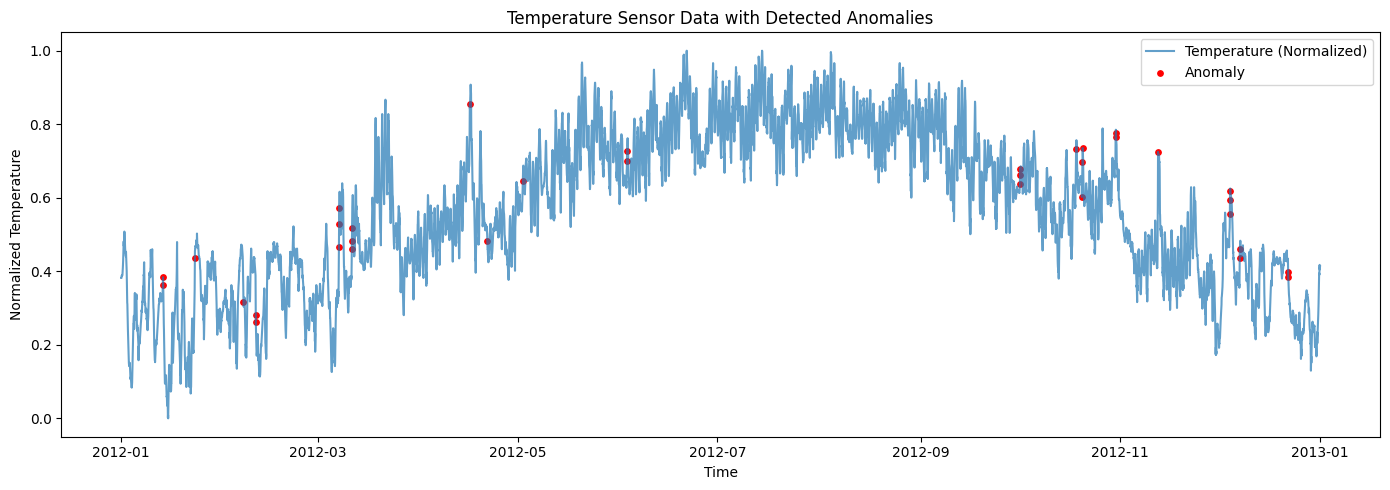

ROC-AUC SVM Baseline: 0.8352490421455938


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
ROC-AUC CNN-LSTM: 0.44315979265269323


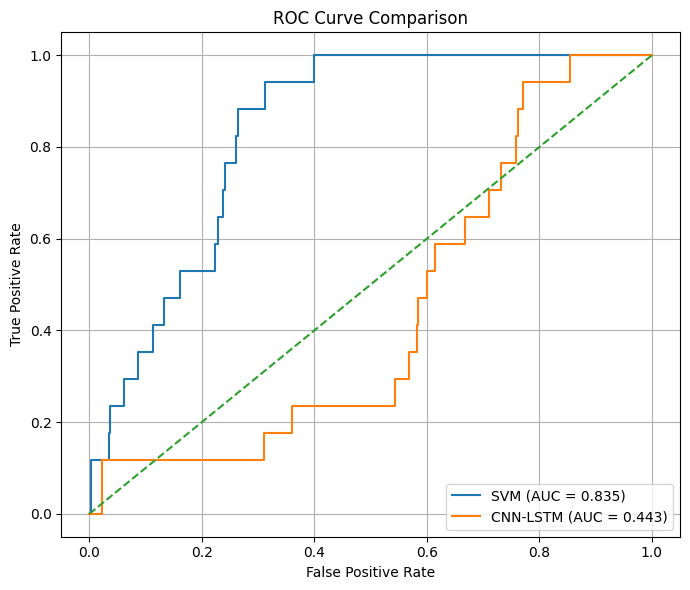

Saved artifact at '/tmp/tmpd_rc5ri9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134349665229264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134349665231376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134349665232336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134352271197392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134349665227536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134349665232528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134349665229840: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model CNN-LSTM berhasil diekspor ke TensorFlow Lite


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


# ======================================================
# 1. LOAD DATA DARI GITHUB
# ======================================================
url = "https://raw.githubusercontent.com/velicki/Weather_Data_Analysis_Project/refs/heads/main/Weather_Data.csv"
data = pd.read_csv(url)

# ======================================================
# 2. CLEANING & NORMALISASI
# ======================================================
data.columns = (
    data.columns.str.strip().str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("%", "percent")
)

data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')
data = data.dropna(subset=['date_time'])
data = data.sort_values('date_time').drop_duplicates(subset='date_time')
data = data.ffill().reset_index(drop=True)

features_col = ['temp_c', 'rel_hum_percent', 'press_kpa']
data = data[['date_time'] + features_col]

scaler = MinMaxScaler()
data[features_col] = scaler.fit_transform(data[features_col])

# ======================================================
# 3. LABEL ANOMALI (ROLLING Z-SCORE)
# ======================================================
rolling_mean = data['temp_c'].rolling(24).mean()
rolling_std = data['temp_c'].rolling(24).std()

data['z_score'] = (data['temp_c'] - rolling_mean) / rolling_std
data['anomaly'] = np.where(data['z_score'].abs() > 3, 1, 0)

# ======================================================
# VISUALISASI DATA & ANOMALI
# ======================================================
plt.figure(figsize=(14, 5))
plt.plot(data['date_time'], data['temp_c'], label='Temperature (Normalized)', alpha=0.7)

anomaly_points = data[data['anomaly'] == 1]
plt.scatter(
    anomaly_points['date_time'],
    anomaly_points['temp_c'],
    color='red',
    label='Anomaly',
    s=15
)

plt.title('Temperature Sensor Data with Detected Anomalies')
plt.xlabel('Time')
plt.ylabel('Normalized Temperature')
plt.legend()
plt.tight_layout()
plt.show()

# ======================================================
# 4. WINDOWING
# ======================================================
def create_window(X, y, w):
    Xs, ys = [], []
    for i in range(len(X) - w):
        Xs.append(X[i:i+w])
        ys.append(y[i+w-1])
    return np.array(Xs), np.array(ys)

WINDOW = 30
X, y = create_window(
    data[features_col].values,
    data['anomaly'].values,
    WINDOW
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

# ======================================================
# 5. BASELINE MODEL (SVM)
# ======================================================
X_train_svm = X_train.reshape(X_train.shape[0], -1)
X_test_svm = X_test.reshape(X_test.shape[0], -1)

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_svm, y_train)

svm_probs = svm.predict_proba(X_test_svm)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)

print("ROC-AUC SVM Baseline:", svm_auc)

# ======================================================
# 6. MODEL CNN-LSTM
# ======================================================
model = Sequential([
    Conv1D(64, 3, activation='relu',
           input_shape=(WINDOW, X.shape[2])),
    MaxPooling1D(2),
    Dropout(0.3),

    LSTM(64),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

cnn_probs = model.predict(X_test).ravel()
cnn_auc = roc_auc_score(y_test, cnn_probs)

print("ROC-AUC CNN-LSTM:", cnn_auc)

# ======================================================
# VISUALISASI ROC CURVE
# ======================================================
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, cnn_probs)

plt.figure(figsize=(7, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_auc:.3f})')
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN-LSTM (AUC = {cnn_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# ======================================================
# 7. EXPORT MODEL KE TENSORFLOW LITE (FIXED)
# ======================================================
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Aktifkan Select TF Ops (WAJIB untuk LSTM)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# Optimasi ukuran model (opsional tapi direkomendasikan)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

with open("cnn_lstm_anomaly.tflite", "wb") as f:
    f.write(tflite_model)

print("Model CNN-LSTM berhasil diekspor ke TensorFlow Lite")

